In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [24]:
def knn_reg_graph(x,y,n_points):
    knn_reg = KNeighborsRegressor(n_neighbors=n_points)
    knn_reg.fit(x,y)
    
    plt.figure(figsize=(10,5))
    plt.scatter(x,y)
    xx = np.linspace(min(x),max(x),100)
    yy = [knn_reg.predict([[point]]) for point in xx]
    plt.plot(xx,yy,c='r')
    
def cost_function_example(x,y):
    ymin = min(y)-10
    ymax = max(y)+10
    reg = LinearRegression()
    
    reg.fit(x,y)
    coeff = reg.coef_[0]
    intercept = reg.intercept_
    
    yy = coeff*x + intercept

    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x,y)
    plt.plot(x,yy,c='r')
    for n in range(0,len(x)):
        seg_min = min((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        seg_max = max((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        plt.axvline(x[n],ymin=seg_min, ymax=seg_max,c='purple')

In [117]:
x, y = make_regression(n_samples=50,n_features=1,noise=40,random_state=2)
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

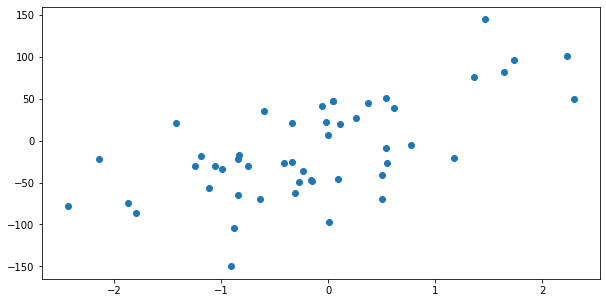

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)

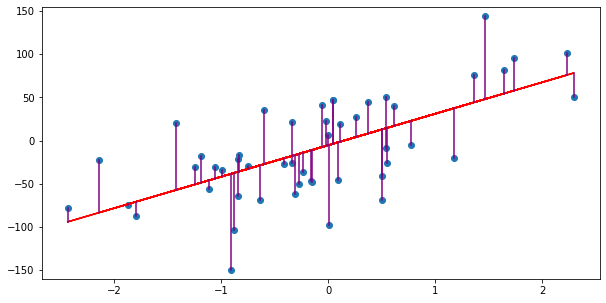

In [20]:
cost_function_example(x,y)

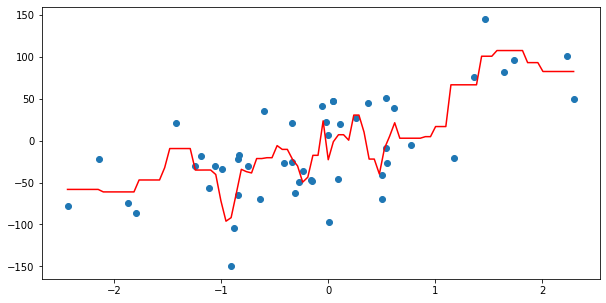

In [25]:
knn_reg_graph(x,y,3)

In [153]:
def cost_function_knn(x,y,n_points):
    ymin = min(y)-10
    ymax = max(y)+10
    
    knn_reg = KNeighborsRegressor(n_neighbors=n_points)
    knn_reg.fit(x,y)
    
    

    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x,y)
    xx = np.linspace(min(x),max(x),400)
    yy = [knn_reg.predict([[point]]) for point in xx]
    plt.plot(xx,yy,c='r')
    
    for n in range(0,len(x)):
        seg_min = min((y[n]-ymin)/(ymax-ymin),(knn_reg.predict(x[n].reshape(1,-1))[0]-ymin)/(ymax-ymin))
        seg_max = max((y[n]-ymin)/(ymax-ymin),(knn_reg.predict(x[n].reshape(1,-1))[0]-ymin)/(ymax-ymin))
        plt.axvline(x[n],ymin=seg_min, ymax=seg_max,c='purple')

In [27]:
knn = KNeighborsRegressor()
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [34]:
knn.predict(x[1].reshape(1,-1))[0]

-2.924661487293025

In [32]:
x[1].reshape(1,-1)

array([[0.61134078]])

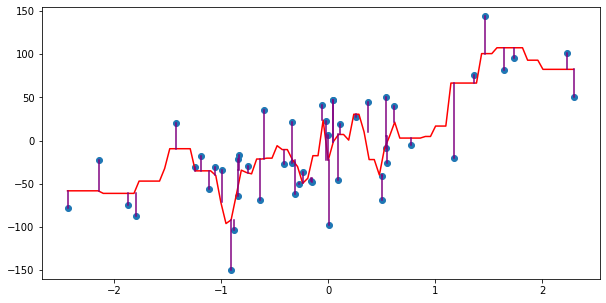

In [39]:
cost_function_knn(x,y,3)

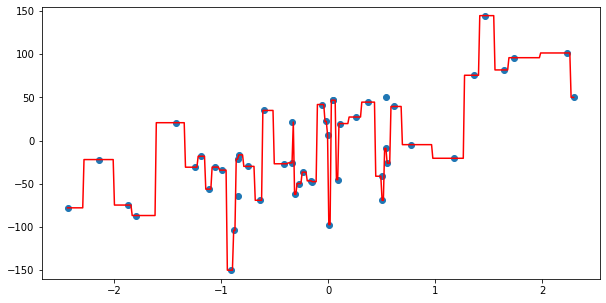

In [154]:
cost_function_knn(x,y,1)

In [49]:
np.array([n for n in range(0,50) if n not in np.random.choice(range(0,len(x)),int(.2*len(x)),replace=False)])

array([ 0,  1,  2,  3,  4,  7, 10, 12, 13, 14, 15, 16, 17, 20, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48])

In [60]:
y[2]

19.60341319362694

In [136]:
def knn_test_error(x,y,n_points,test_size):
    ymin = min(y)-10
    ymax = max(y)+10
    
    test = np.random.choice(range(0,len(x)),int(test_size*len(x)),replace=False)
    x_train = np.array([x[n] for n in range(0,len(x)) if n not in test])
    x_train = [[x[n][0]] for n in range(0,len(x)) if n not in test]
    y_train = [y[n] for n in range(0,len(x)) if n not in test]
    knn_reg = KNeighborsRegressor(n_neighbors=n_points)
    knn_reg.fit(x_train,y_train)
    
    x_test = [x[n][0] for n in test]
    y_test = [y[n] for n in test]
    y_pred = knn.predict(np.array(x_test).reshape(-1,1))

    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x_train,y_train,c='b')
    plt.scatter(x_test,y_test,c='r')
    
    xx = np.linspace(min(x),max(x),100)
    yy = [knn_reg.predict([[point]]) for point in xx]
    plt.plot(xx,yy,c='r')
    
    total_error = 0
    for n in range(0,len(x_test)):
        seg_min = min((y_test[n]-ymin)/(ymax-ymin),(knn_reg.predict(x_test[n].reshape(1,-1))[0]-ymin)/(ymax-ymin))
        seg_max = max((y_test[n]-ymin)/(ymax-ymin),(knn_reg.predict(x_test[n].reshape(1,-1))[0]-ymin)/(ymax-ymin))
        plt.axvline(x_test[n],ymin=seg_min, ymax=seg_max,c='purple')
        total_error += (y_test[n]-y_pred[n])**2
        
    return total_error/len(x_test)

1351.2850313993742

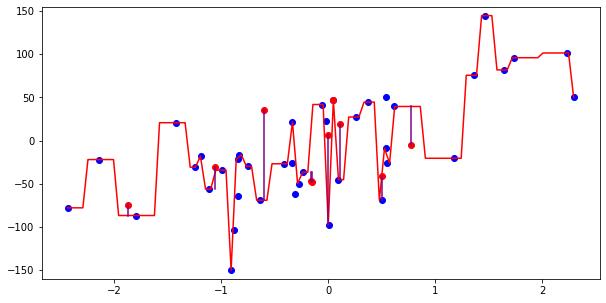

In [138]:
knn_test_error(x,y,1,.2)

949.2281607639932

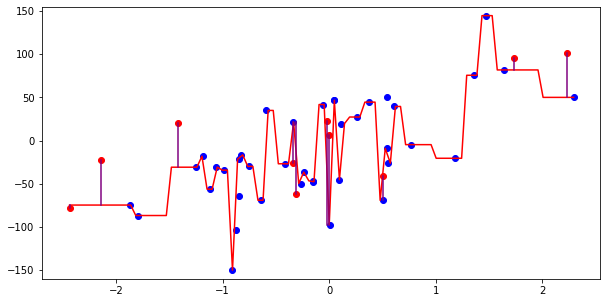

In [139]:
knn_test_error(x,y,1,.2)

2893.9867969289767

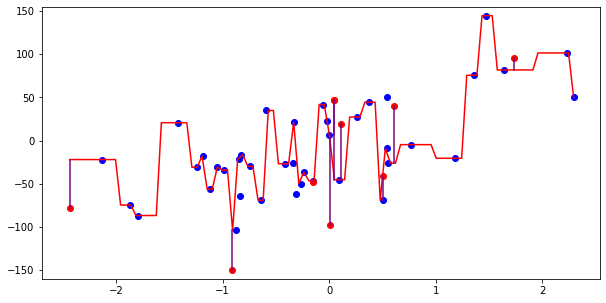

In [140]:
knn_test_error(x,y,1,.2)

1163.5428095721547

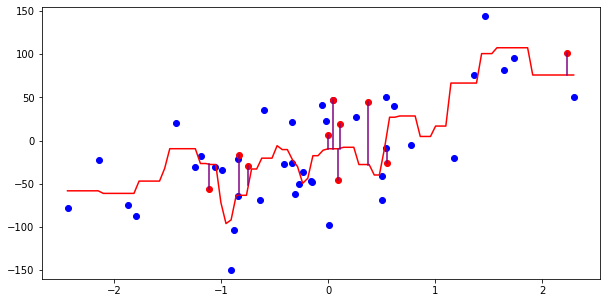

In [141]:
knn_test_error(x,y,3,.2)

1684.2436810210925

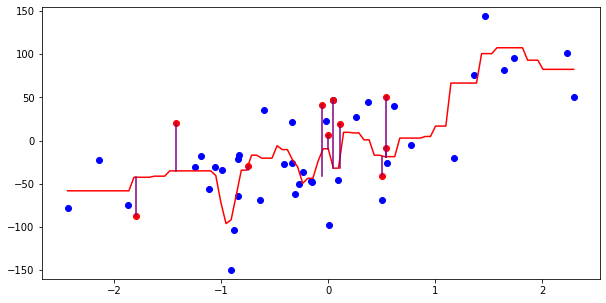

In [142]:
knn_test_error(x,y,3,.2)

1509.909096251284

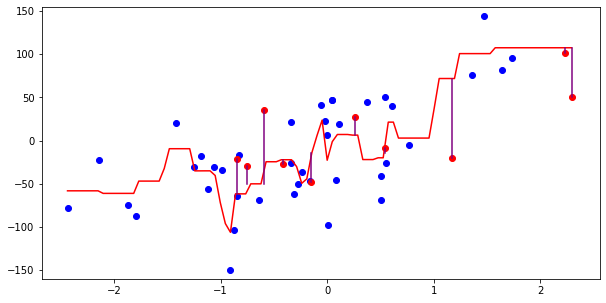

In [155]:
knn_test_error(x,y,3,.2)

2171.4472689549493

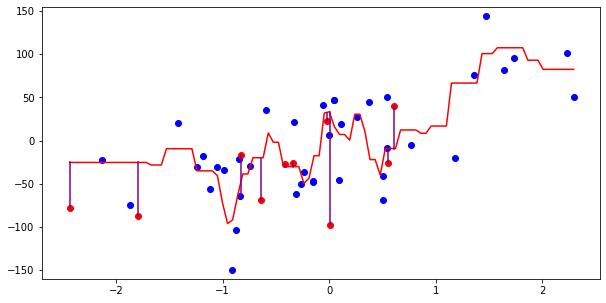

In [144]:
knn_test_error(x,y,3,.2)

3269.6157411904583

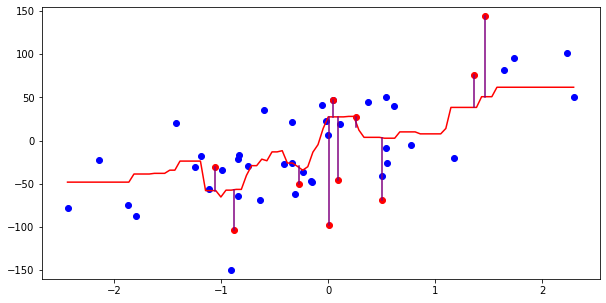

In [145]:
knn_test_error(x,y,5,.2)

1778.3630889471938

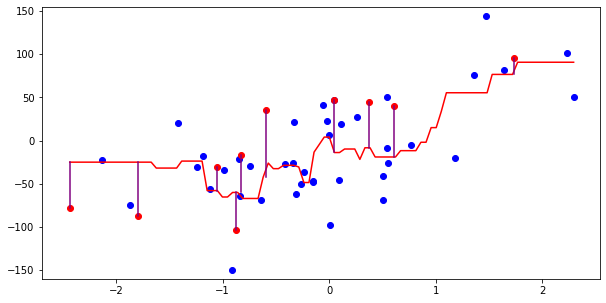

In [146]:
knn_test_error(x,y,5,.2)

1808.0105438271523

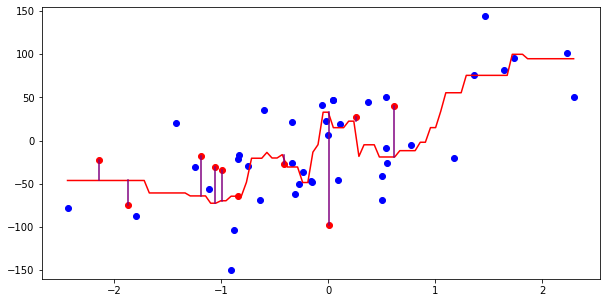

In [147]:
knn_test_error(x,y,5,.2)

In [97]:
x, y = make_regression(n_samples=75,n_features=1,noise=40,random_state=2)

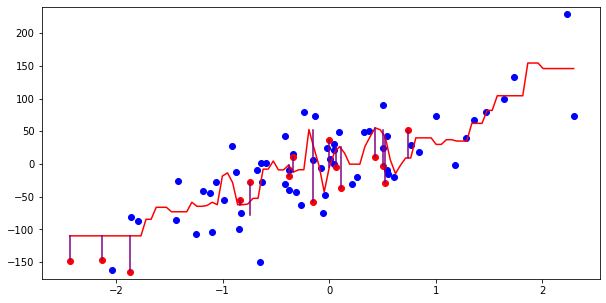

In [103]:
knn_test_error(x,y,3,.2)